In [3]:
%%HTML
<div class='tableauPlaceholder' id='viz1640733404006' style='position: relative'><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book2_16323263205690&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1640733404006');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [4]:
%%HTML
<div class='tableauPlaceholder' id='viz1640734710639' style='position: relative'><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book3_16407342150120&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1640734710639');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Python EDA

Transaction Plot

In [381]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,15
import numpy as np

In [382]:
transactions = pd.read_csv('./store-sales-time-series-forecasting/transactions.csv')
#transactions['Time'] = np.arange(len(transactions.index))
#transactions = transactions.drop(columns=["store_nbr"])

In [383]:
transactions.head()


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [166]:
print(transactions.iloc[0,2])

770


Consolidate all of the sales for each date

In [384]:
transactions_dates = transactions['date'].drop_duplicates()
transactions_dates[:5]


0      2013-01-01
1      2013-01-02
47     2013-01-03
93     2013-01-04
139    2013-01-05
Name: date, dtype: object

In [385]:

transactions_cons = transactions.values.tolist()
transactions_cons[:5]

[['2013-01-01', 25, 770],
 ['2013-01-02', 1, 2111],
 ['2013-01-02', 2, 2358],
 ['2013-01-02', 3, 3487],
 ['2013-01-02', 4, 1922]]

In [386]:
trans_by_date = {}

for date in transactions_dates:
    trans_by_date[date] = 0

for date in transactions_cons:
    trans_by_date[date[0]] = trans_by_date[date[0]] + date[2]

print(trans_by_date)


{'2013-01-01': 770, '2013-01-02': 93215, '2013-01-03': 78504, '2013-01-04': 78494, '2013-01-05': 93573, '2013-01-06': 90464, '2013-01-07': 75597, '2013-01-08': 72325, '2013-01-09': 71971, '2013-01-10': 66383, '2013-01-11': 70338, '2013-01-12': 85511, '2013-01-13': 86306, '2013-01-14': 70078, '2013-01-15': 71134, '2013-01-16': 72471, '2013-01-17': 68873, '2013-01-18': 71371, '2013-01-19': 88558, '2013-01-20': 85281, '2013-01-21': 73250, '2013-01-22': 68988, '2013-01-23': 69819, '2013-01-24': 63705, '2013-01-25': 71273, '2013-01-26': 88022, '2013-01-27': 83304, '2013-01-28': 70389, '2013-01-29': 68435, '2013-01-30': 70888, '2013-01-31': 70268, '2013-02-01': 78302, '2013-02-02': 97347, '2013-02-03': 87026, '2013-02-04': 75330, '2013-02-05': 76206, '2013-02-06': 75291, '2013-02-07': 72789, '2013-02-08': 79726, '2013-02-09': 90342, '2013-02-10': 69963, '2013-02-11': 67222, '2013-02-12': 71808, '2013-02-13': 80098, '2013-02-14': 88681, '2013-02-15': 75789, '2013-02-16': 92816, '2013-02-17': 

In [387]:
tran_values = []
for values in trans_by_date:
    tran_values.append(trans_by_date[values])
print(tran_values[:5])

[770, 93215, 78504, 78494, 93573]


In [395]:
transactions_df = pd.DataFrame()
transactions_df['Dates'] = transactions_dates
transactions_df['Transactions'] = tran_values
#df['Time'] = np.arange(len(df.index))
transactions_df['Time'] = np.arange(len(transactions_df.index))
#transactions_df = transactions_df.drop(columns=['index'])
transactions_df = transactions_df.reset_index(drop=True)
transactions_df.head()

,Dates,Transactions,Time
0,2013-01-01,770,0
1,2013-01-02,93215,1
2,2013-01-03,78504,2
3,2013-01-04,78494,3
4,2013-01-05,93573,4


<AxesSubplot:xlabel='Time'>

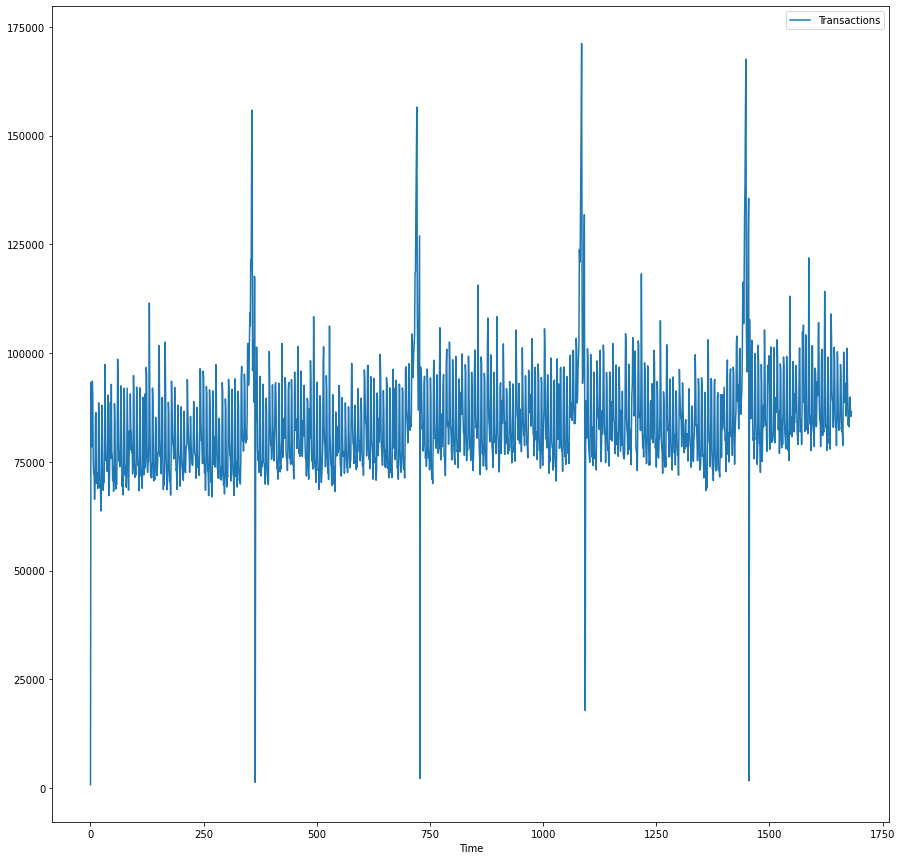

In [238]:
transactions_df.plot(x="Time")

LAG FEATURES

In [396]:
#df['Lag_1'] = df['Hardcover'].shift(1)
#df = df.reindex(columns=['Hardcover', 'Lag_1'])

#df.head()

transactions_df_lag = transactions_df
transactions_df_lag['Lag_1'] = transactions_df_lag['Transactions'].shift(1)
transactions_df_lag = transactions_df_lag.reindex(columns=['Transactions', 'Lag_1'])
transactions_df_lag = transactions_df_lag.reset_index(drop=True)
transactions_df_lag.head()


,Transactions,Lag_1
0,770,NaN
1,93215,770.0
2,78504,93215.0
3,78494,78504.0
4,93573,78494.0


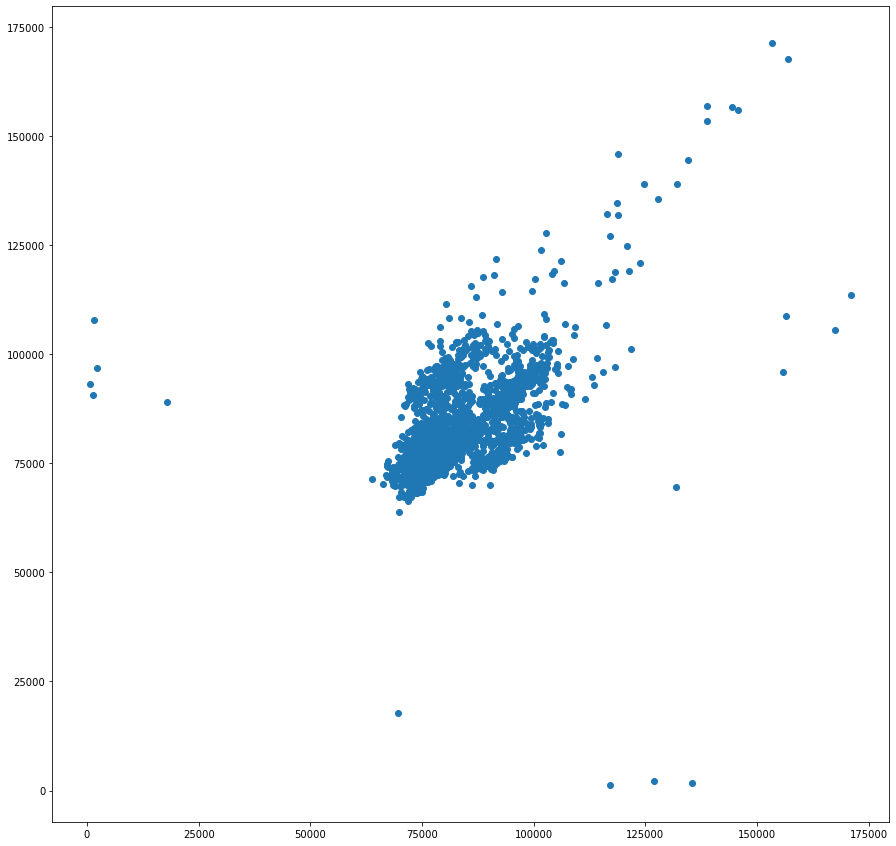

In [267]:

plt.scatter(x=transactions_df_lag['Lag_1'], y=transactions_df_lag['Transactions'])


Linear Regression

(1682, 1)


Text(0.5, 1.0, 'Time Plot of Total Transactions')

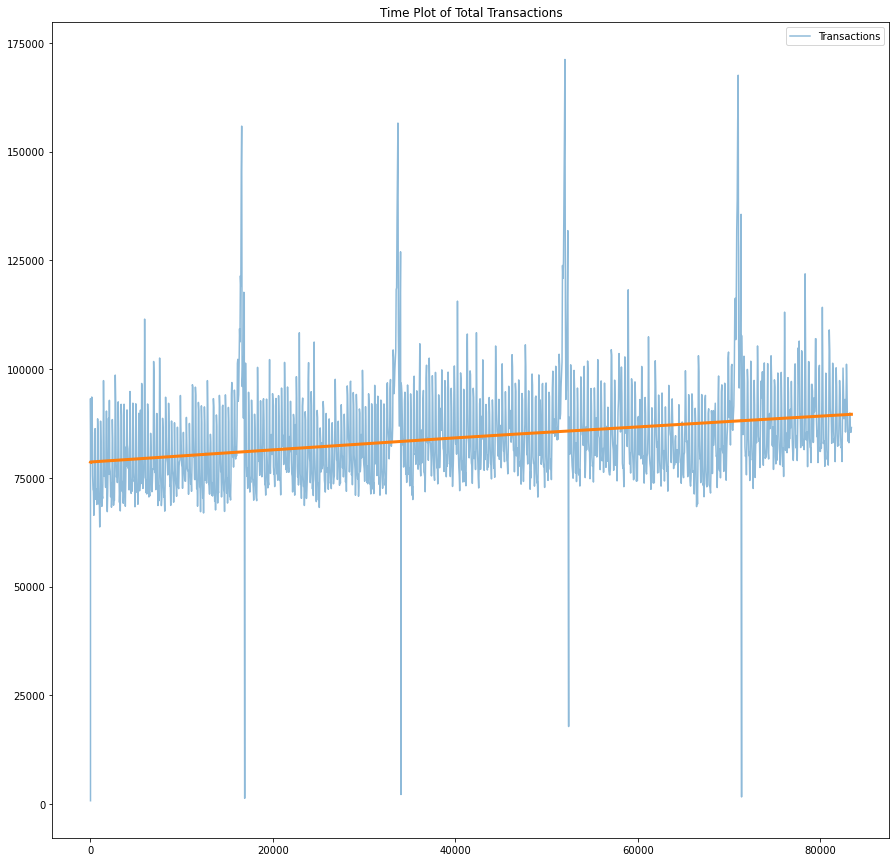

In [301]:
from sklearn.linear_model import LinearRegression

transactions_df.reset_index()

#Training data
X = transactions_df.loc[:, ['Time']] #features
y = transactions_df.loc[:, ['Transactions']]#target

print(X.shape)

#Train the model
model = LinearRegression()

model.fit(X,y)

model_1d = [x[0] for x in model.predict(X)]

#print(model_1d)

#Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model_1d, index=X.index)

ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Transactions')


In [303]:
model.coef_

array([[6.52469305]])

In [400]:
#Training data
X = transactions_df_lag.loc[:, ['Lag_1']].dropna()  # features
y = transactions_df_lag.loc[:, 'Transactions']  # target
y, X = y.align(X, join='inner')

model = LinearRegression()
model.fit(X, y)

# the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)




1       93215
2       78504
3       78494
4       93573
5       90464
        ...  
1677    89551
1678    89927
1679    85993
1680    85448
1681    86561
Name: Transactions, Length: 1681, dtype: int64
        Lag_1
1       770.0
2     93215.0
3     78504.0
4     78494.0
5     93573.0
...       ...
1677  83064.0
1678  89551.0
1679  89927.0
1680  85993.0
1681  85448.0

[1681 rows x 1 columns]


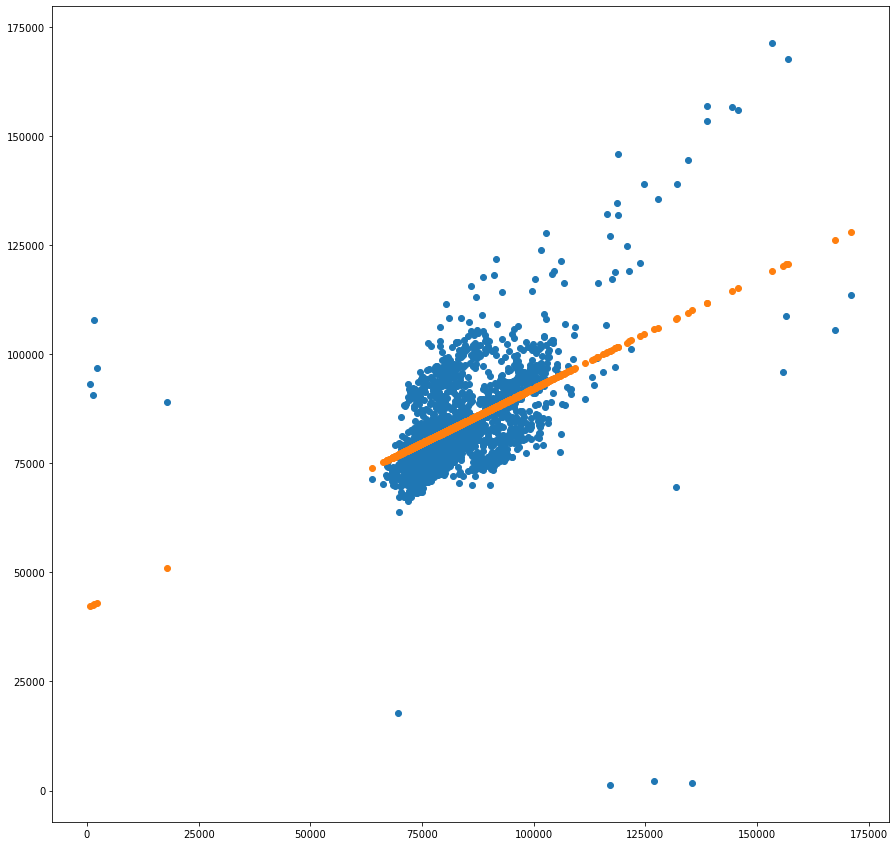

In [411]:
transactions_df_lag_X = transactions_df_lag['Lag_1'][1:]
transactions_df_lag_Y = transactions_df_lag['Transactions'][1:]
plt.scatter(x=transactions_df_lag_X, y=transactions_df_lag_Y)
plt.scatter(x=transactions_df_lag_X, y=y_pred)

In [ ]:
EDA of 